## Author: Akash

### Visualising and Exploring Redlining Index, Housing Priority Index and Minority Populations across Census Tracts

Data Source: Redlining Shapefiles (University of Richmond), Housing Priority Index (Urban Institute)

In [ ]:
#Loading needed libraries
import geopandas as gpd
import matplotlib.pyplot as plt

/home/jovyan/venv/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
#Saving data in shared path and checking if connection has been established
!ls /datasets/rent_prioritisation

ls: cannot access '/datasets/rent_prioritisation': No such file or directory


In [ ]:
#Reading all datasets

#Rental Prioritisation Index Data
rent_data = gpd.read_file('/datasets/rent prioritisation/housing_index_state_adj.geojson')
rent_data['GEOID'] = rent_data['GEOID'].astype(float)

#Reading the redlining data made available by the Mapping Inequality Project
redline_data = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/redlining_all/shapefile/holc_ad_data.shp')

#Subsetting rental prioritisation data for only minority population details
minorities_data = rent_data[['GEOID','county_name','state_name','perc_person_of_color','geometry']]

#California Data
cali_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/california/cali_redlined_numerical_values.geojson')
cali_rent_data = rent_data.merge(cali_redline[['GEOID','reweighted_redline_index','ordinal_value']],how='inner',on='GEOID')

#NY Data
ny_redline = gpd.read_file('/work/COVIDRedlining/data/new york/ny_redlined_numerical_values.geojson')
ny_redline['GEOID'] = ny_redline['GEOID'].astype(object)
ny_rent_data = rent_data.merge(ny_redline[['GEOID','reweighted_redline_index','ordinal_value']],how='inner',on='GEOID')

#Chicago Data
chicago_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/chicago/chicago_redlined_numerical_values.geojson')
chicago_rent_data = rent_data.merge(chicago_redline[['GEOID','reweighted_redline_index','ordinal_value']],how='inner',on='GEOID')

#Dallas Data
dallas_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/dallas/dallas_redlined_numerical_values.geojson')
dallas_rent_data = rent_data.merge(dallas_redline[['GEOID','reweighted_redline_index','ordinal_value']],how='inner',on='GEOID')

#Detroit Data
detroit_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/detroit/detroit_redlined_numerical_values.geojson')
detroit_rent_data = rent_data.merge(detroit_redline[['GEOID','reweighted_redline_index','ordinal_value']],how='inner',on='GEOID')

#Minneapolis Data
minneapolis_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/minneapolis/minneapolis_redlined_numerical_values.geojson')
minneapolis_rent_data = rent_data.merge(minneapolis_redline[['GEOID','reweighted_redline_index','ordinal_value']],how='inner',on='GEOID')

#Newark Data
newark_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/newark/newark_redlined_numerical_values.geojson')
newark_rent_data = rent_data.merge(newark_redline[['GEOID','reweighted_redline_index','ordinal_value']],how='inner',on='GEOID')

#Tampa Data
tampa_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/tampa/tampa_redlined_numerical_values.geojson')
tampa_rent_data = rent_data.merge(tampa_redline[['GEOID','reweighted_redline_index','ordinal_value']],how='inner',on='GEOID')

#Atlanta Data
atlanta_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/atlanta/atlanta_redlined_numerical_values.geojson')
atlanta_rent_data = rent_data.merge(atlanta_redline[['GEOID','reweighted_redline_index','ordinal_value']],how='inner',on='GEOID')

#Boston Data
boston_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/boston/boston_redlined_numerical_values.geojson')
boston_rent_data = rent_data.merge(boston_redline[['GEOID','reweighted_redline_index','ordinal_value']],how='inner',on='GEOID')

#Houston Data
houston_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/houston/houston_redlined_numerical_values.geojson')
houston_rent_data = rent_data.merge(houston_redline[['GEOID','reweighted_redline_index','ordinal_value']],how='inner',on='GEOID')

#Nashville Data
nashville_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/nashville/nashville_redlined_numerical_values.geojson')
nashville_rent_data = rent_data.merge(nashville_redline[['GEOID','reweighted_redline_index','ordinal_value']],how='inner',on='GEOID')

#St. Louis Data
stlouis_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/stlouis/stlouis_redlined_numerical_values.geojson')
stlouis_rent_data = rent_data.merge(stlouis_redline[['GEOID','reweighted_redline_index','ordinal_value']],how='inner',on='GEOID')

DriverError: /datasets/rent prioritisation/housing_index_state_adj.geojson: No such file or directory

## Proportion of minorities across census tracts needing rental assistance

In [ ]:
#Function for visualising rental index and minority populations for each city
def minority_rental_map(y1,y2,x1,x2,city):
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

    ax1.set_title('Minority Distribution in '+city, fontsize=18)
    minorities_data.plot(ax=ax1, column='perc_person_of_color', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

    ax2.set_title('Rental Prioritisation in '+city, fontsize=18)
    rent_data.plot(ax= ax2, column = 'total_index_quantile',cmap='coolwarm',linewidth=.6, edgecolor='0.2',legend=True)

    ax1.set_ylim(y1, y2)
    ax1.set_xlim(x1,x2)

    ax2.set_ylim(y1,y2)
    ax2.set_xlim(x1,x2)

#### New York

(-74.259376, -73.725166)

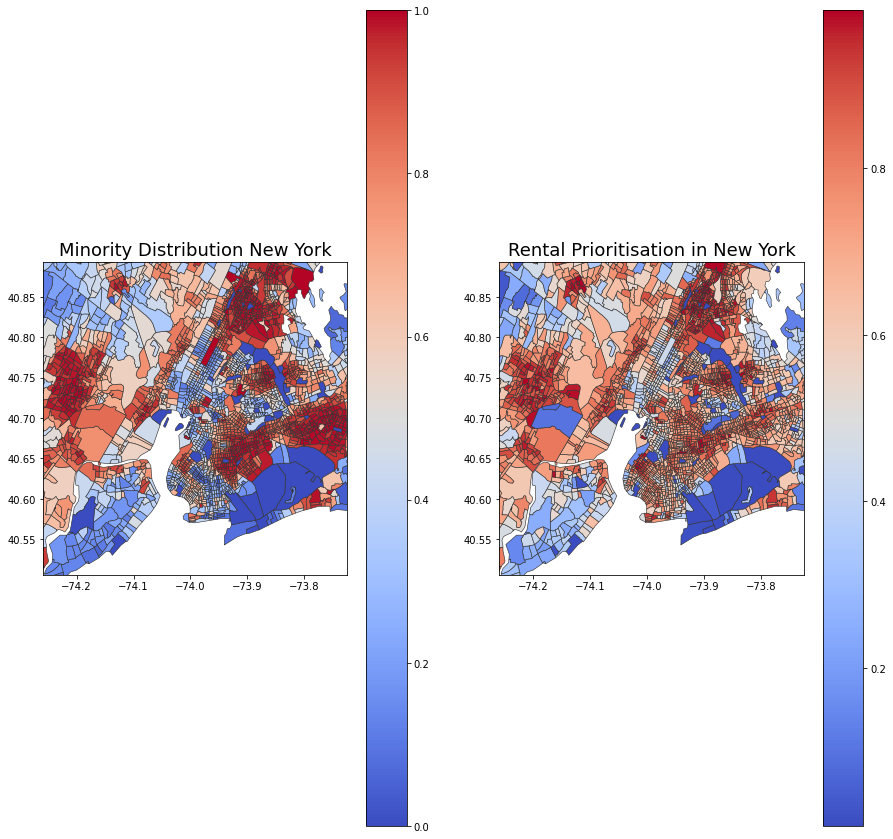

In [ ]:
#Mapping both data for New York City
minority_rental_map(40.506299, 40.893601,-74.259376, -73.725166,'New York')

#### LA

(-118.553885, -118.099326)

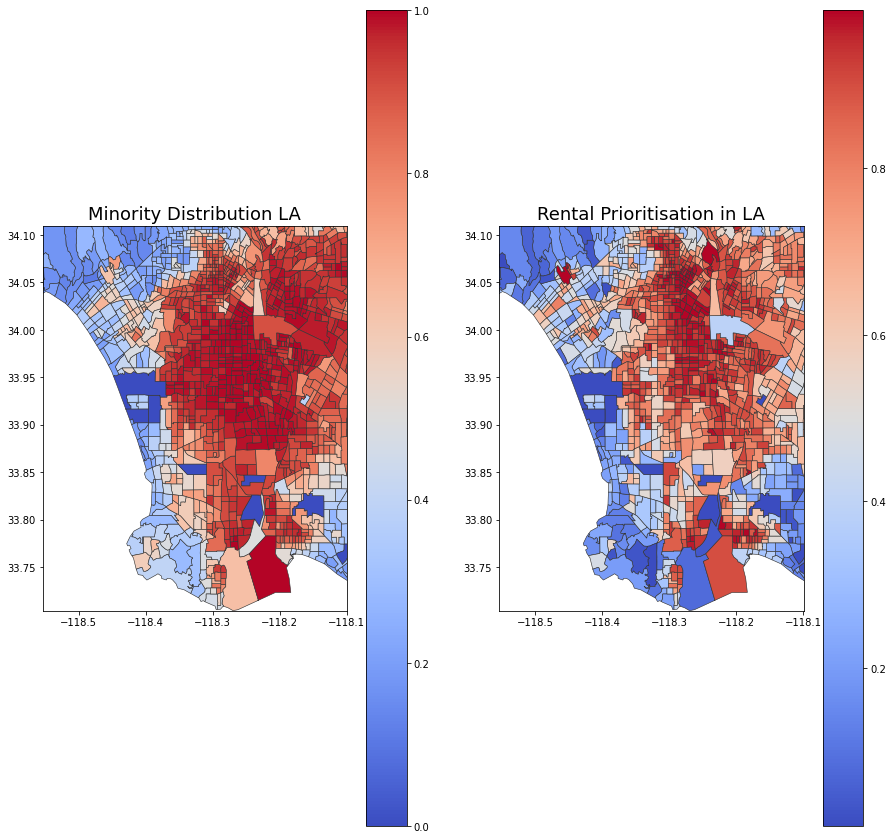

In [ ]:
#Mapping both data for LA
minority_rental_map(33.703996, 34.109748,-118.553885, -118.099326,'Los Angeles')

#### San Francisco

(-122.518342, -122.354233)

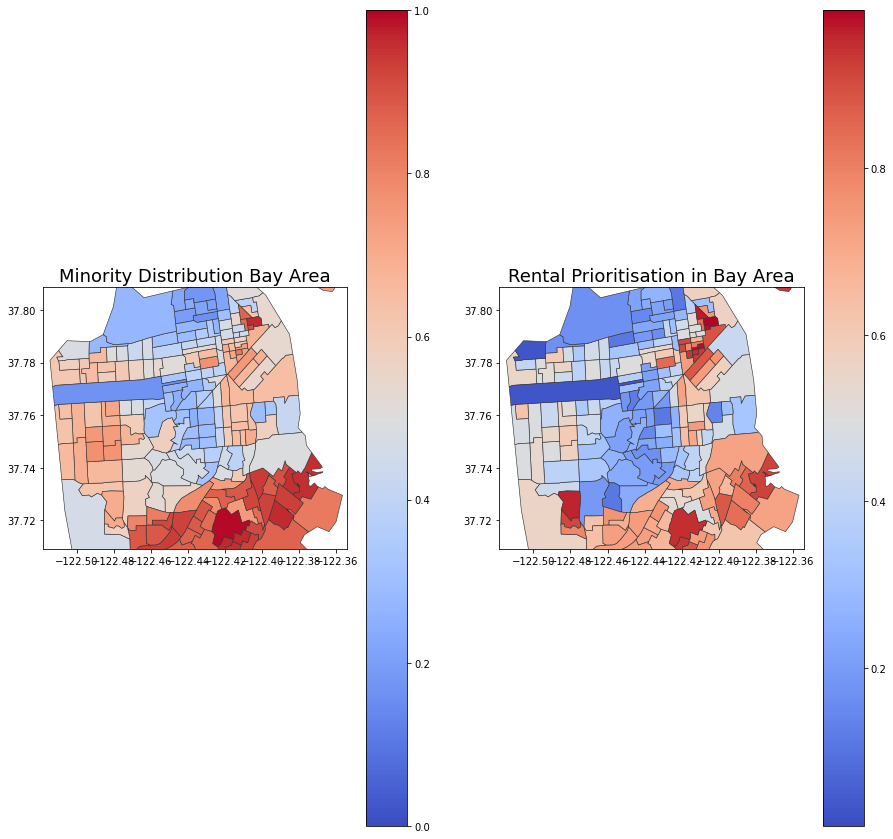

In [ ]:
#Mapping both data for Bay Area
minority_rental_map(37.709061, 37.808676,-122.518342, -122.354233, 'San Francisco')

#### Chicago

(-87.684688, -87.508906)

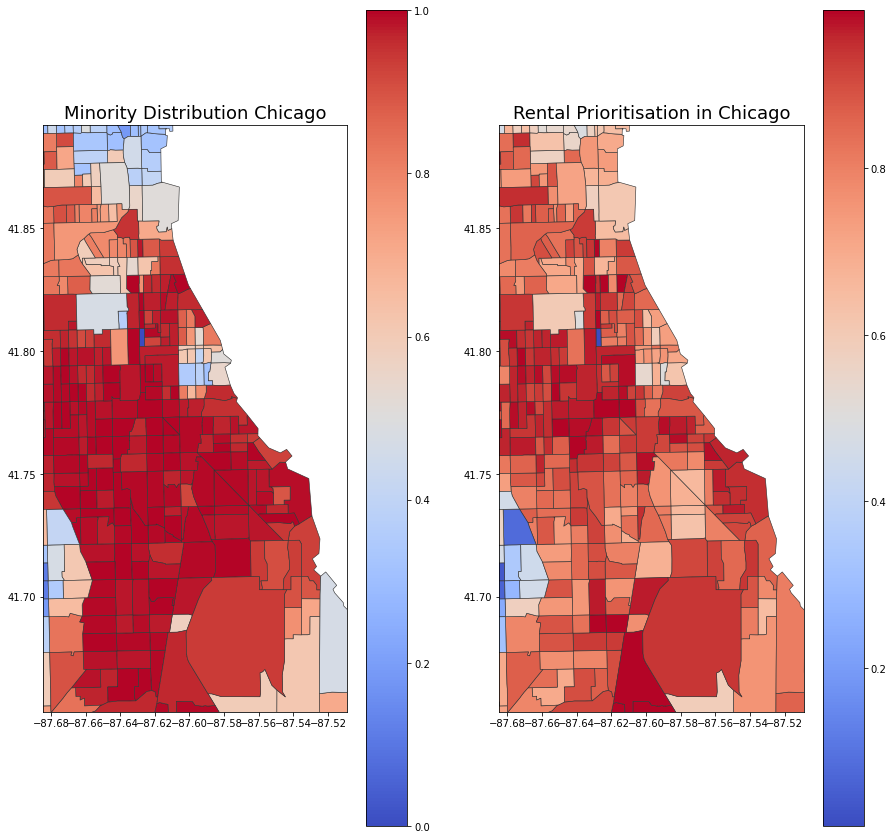

In [ ]:
#Mapping both data for Chicago
minority_rental_map(41.653128, 41.892277,-87.684688, -87.508906, 'Chicago')

#### Detroit

(-83.243609, -82.898913)

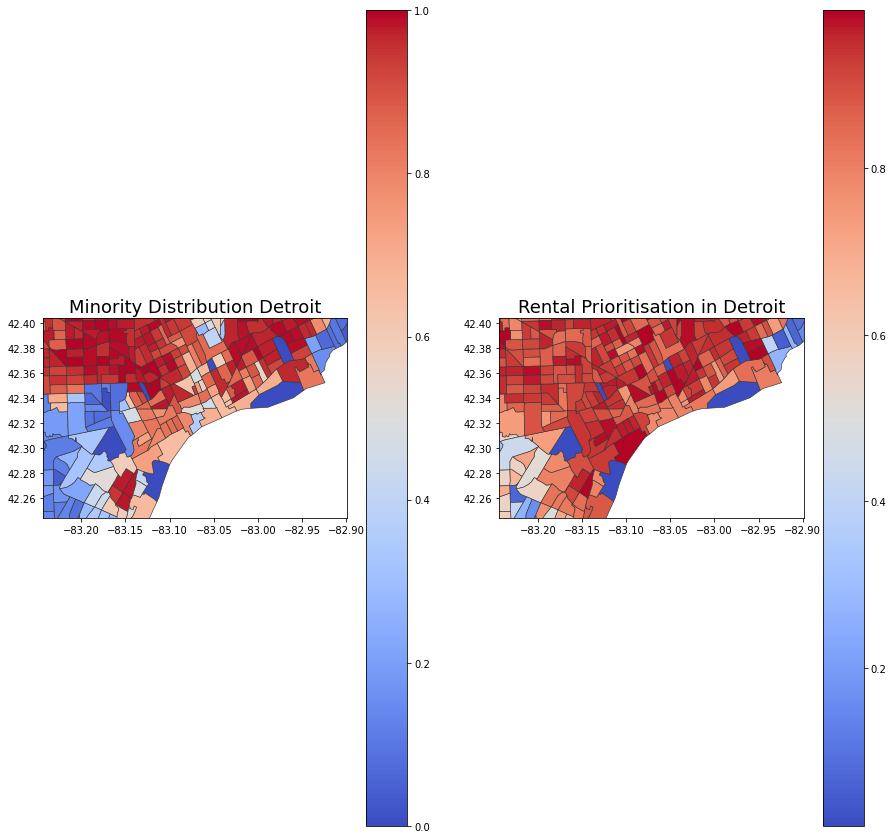

In [ ]:
#Mapping both data for Detroit
minority_rental_map(42.244090, 42.403499,-83.243609, -82.898913, 'Detroit')

#### St. Louis

(-90.348129, -90.165482)

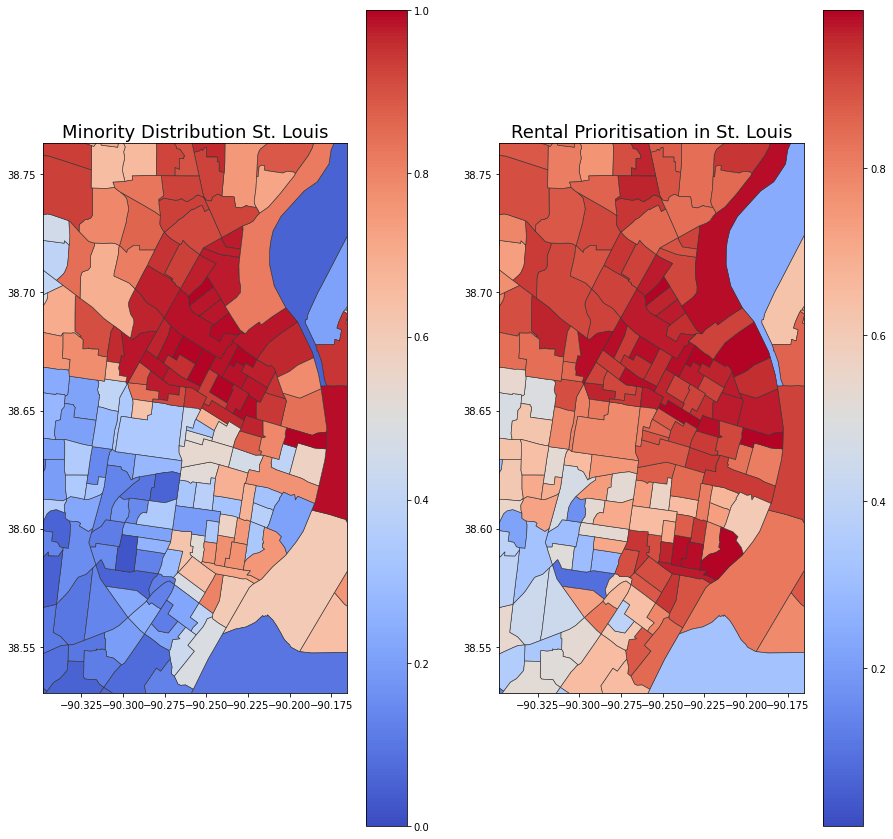

In [ ]:
#Mapping both data for St. Louis
minority_rental_map(38.530442, 38.763186,-90.348129, -90.165482, 'St. Louis')

#### Houston

(-95.541229, -95.141602)

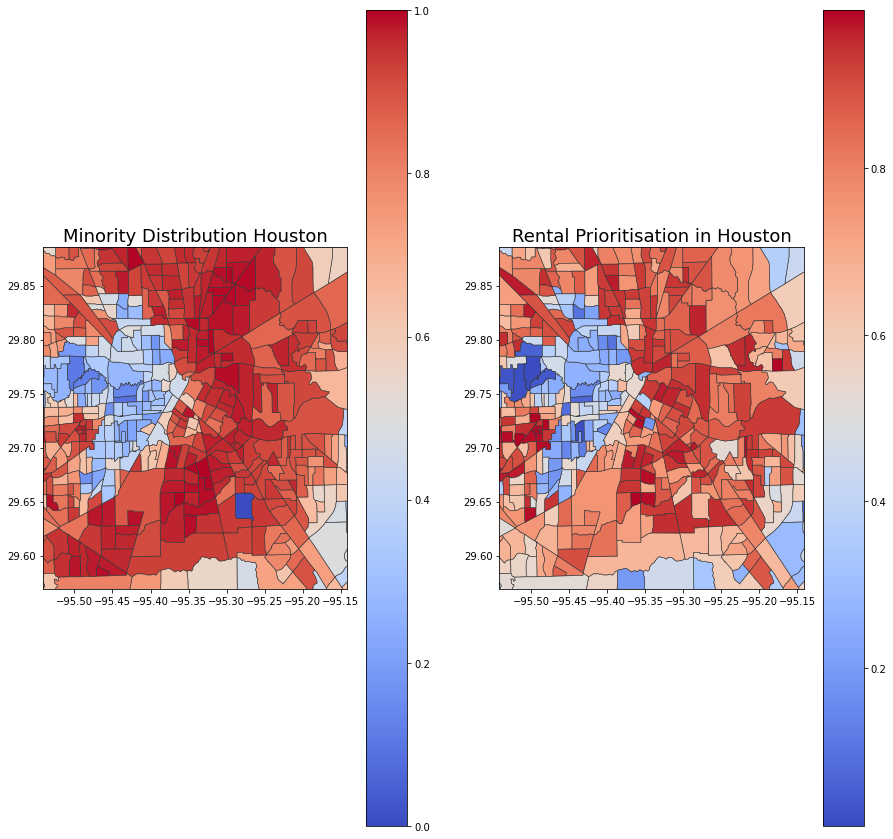

In [ ]:
#Mapping both data for Houston

minority_rental_map(29.568679, 29.885900,-95.541229, -95.141602, 'Hoston')

#### Dallas

(-96.914445, -96.628801)

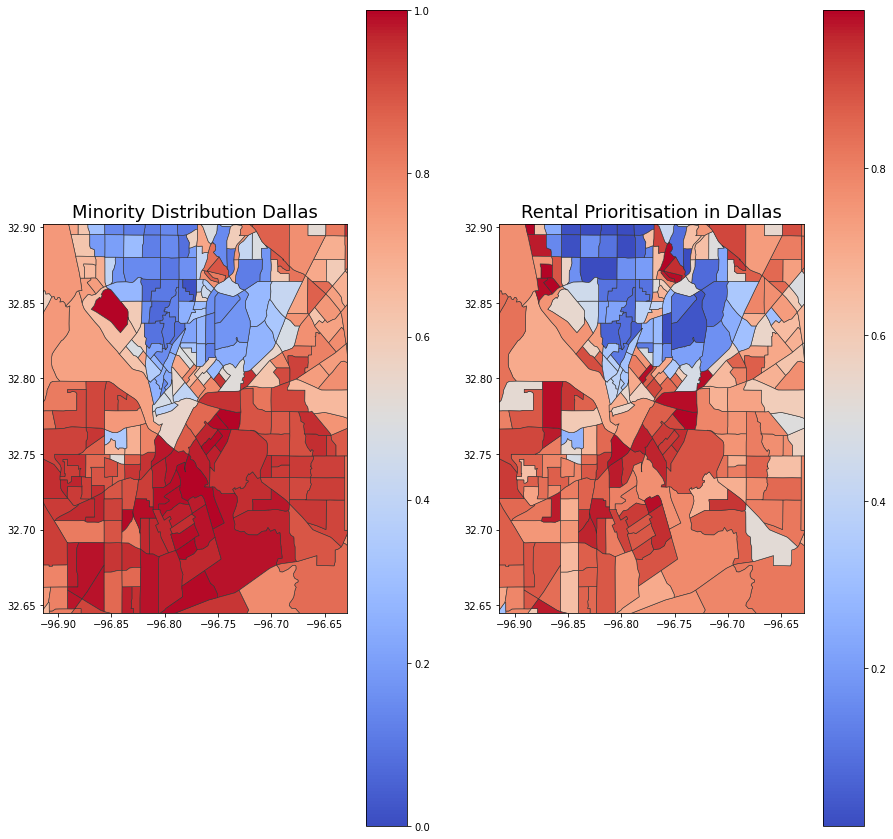

In [ ]:
#Mapping both data for Dallas
minority_rental_map(32.645012, 32.902506,-96.914445, -96.628801, 'Dallas')

#### Tampa

(-82.562047, -82.383519)

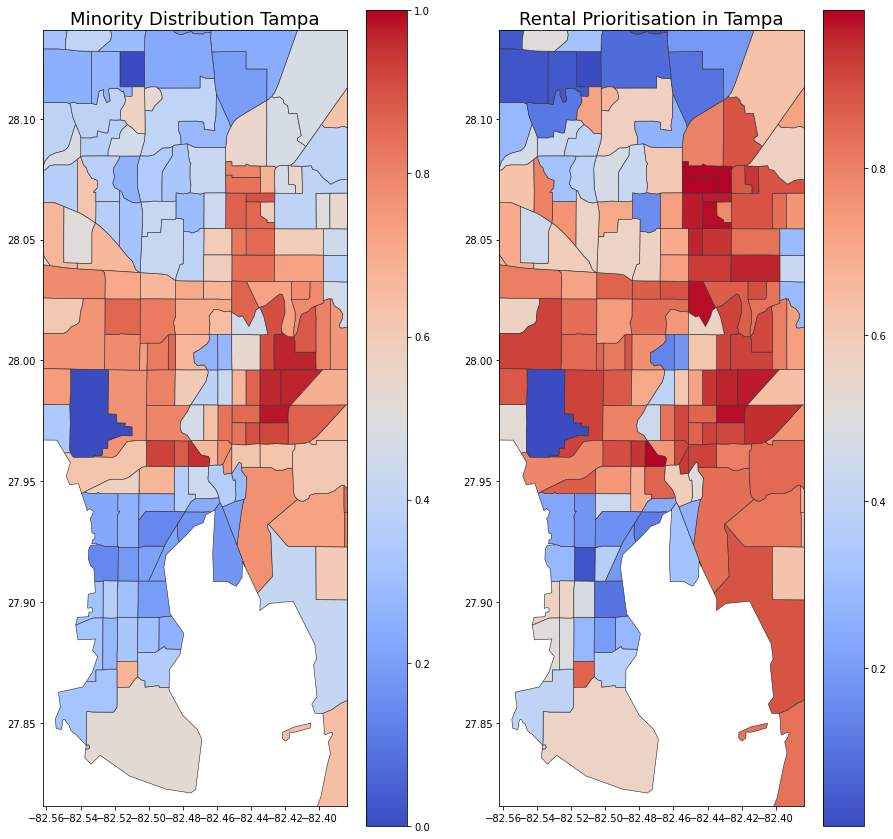

In [ ]:
#Mapping both data for Tampa
minority_rental_map(27.815432, 28.136826,-82.562047, -82.383519, 'Tampa')

#### Atlanta

(-84.570093, -84.353113)

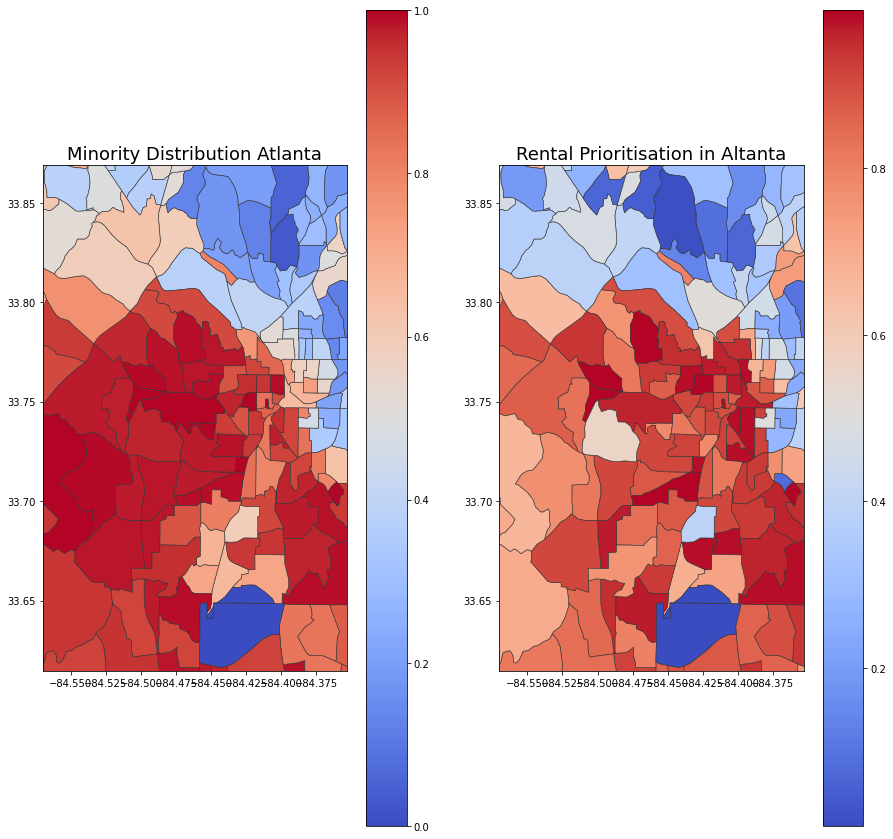

In [ ]:
#Mapping both data for Atlanta
minority_rental_map(33.614400, 33.869057,-84.570093, -84.353113, 'Atlanta')

#### Nashville

(-86.875063, -86.682802)

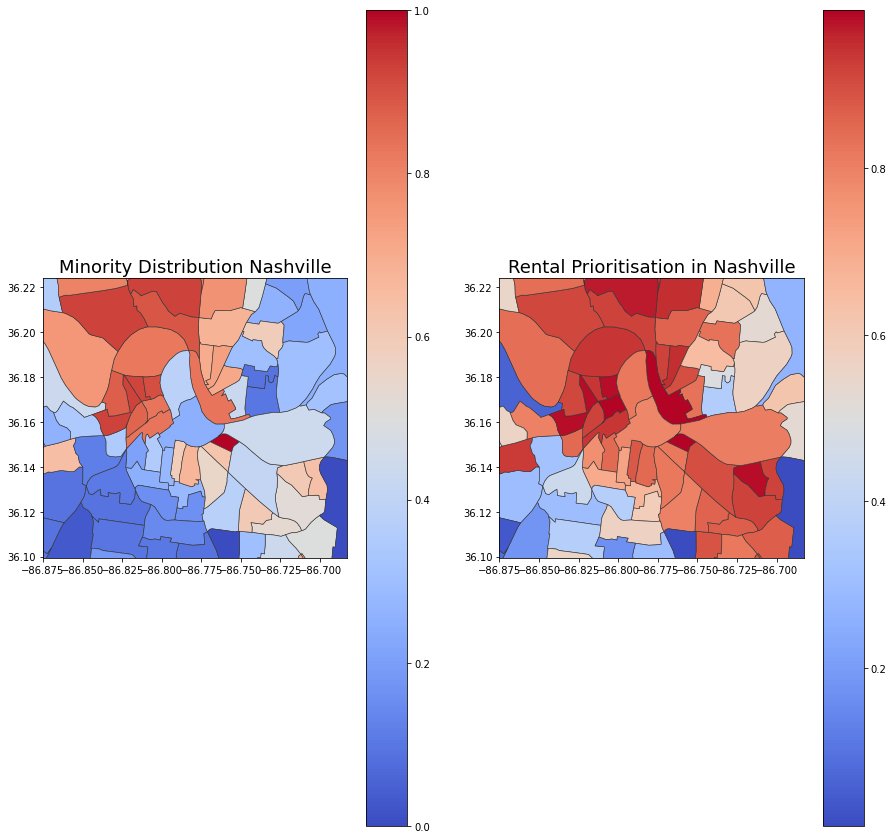

In [ ]:
#Mapping both data for Nashville
minority_rental_map(36.099351, 36.224083,-86.875063, -86.682802, 'Nashville')

#### Boston

In [ ]:
#Mapping both data for Boston
minority_rental_map(42.261061, 42.400148,-71.128787,-70.983219, 'Boston')

NameError: name 'minority_rental_map' is not defined

#### Newark

(-74.252472, -74.116516)

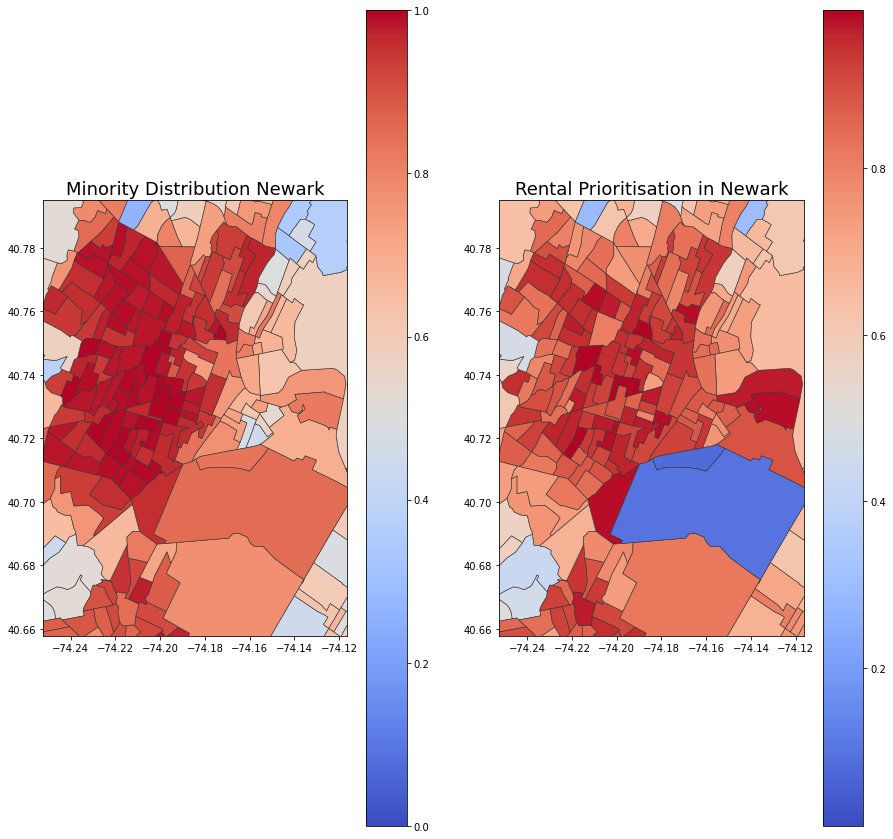

In [ ]:
#Mapping both data for Newark
minority_rental_map(40.657722, 40.795098,-74.252472,-74.116516, 'Newark')

#### Minneapolis

(-93.355556, -93.13377)

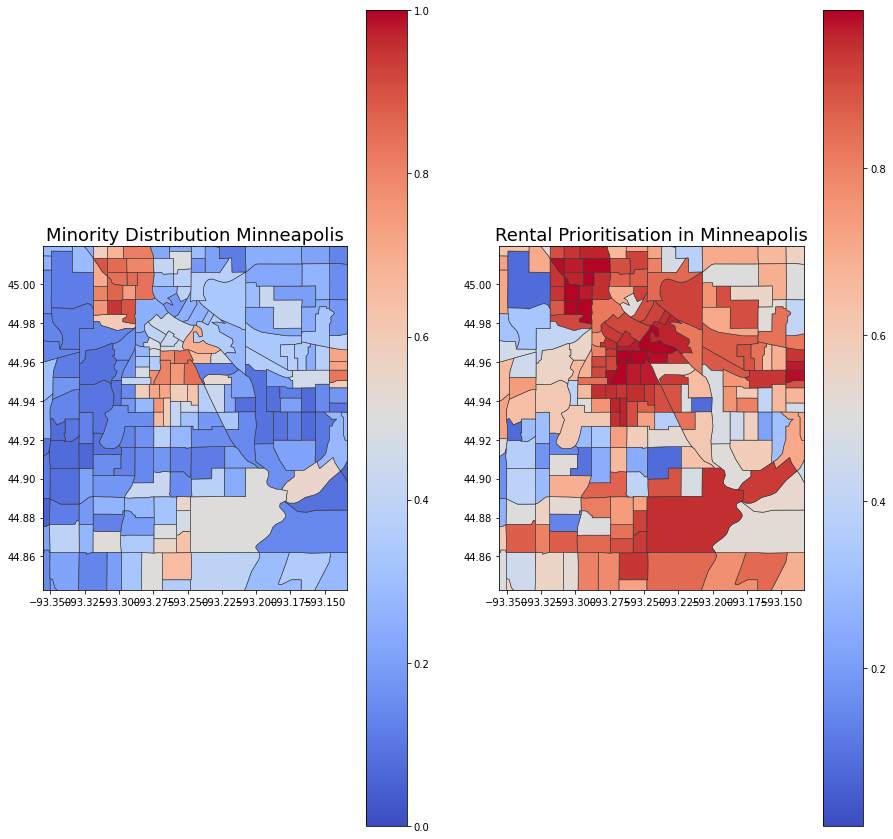

In [ ]:
#Mapping both data for Minneapolis
minority_rental_map(44.842875, 45.019335,-93.355556,-93.133770, 'Minneapolis')

## Plotting Rental Assistance vs Ordinal Redline Index

In [ ]:
#Function for visualising rental and redlining maps for each city
def rental_redline_map(y1,y2,x1,x2,city,state_redline):
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

    ax1.set_title('Rental Prioritisation '+city, fontsize=18)
    rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

    ax2.set_title('Redline Index ', fontsize=18)
    state_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

    ax1.set_ylim(y1,y2)
    ax1.set_xlim(x1,x2)

    ax2.set_ylim(y1,y2)
    ax2.set_xlim(x1,x2)

#### LA

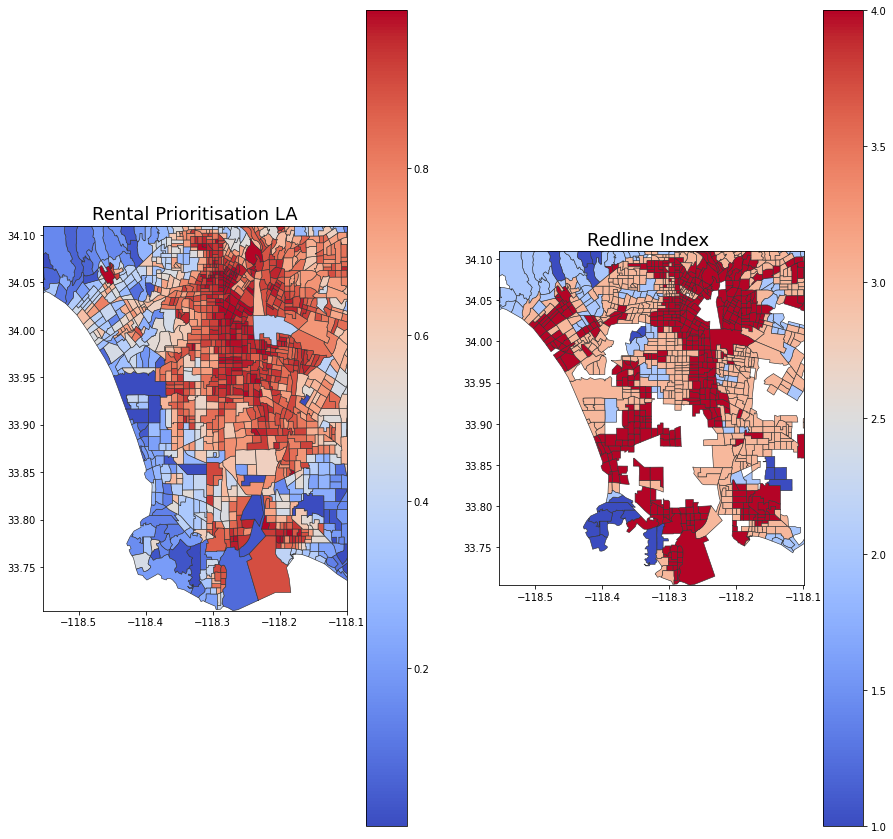

In [ ]:
rental_redline_map(33.703996, 34.109748,-118.553885, -118.099326,'LA',cali_redline)

(-118.553885, -118.099326)

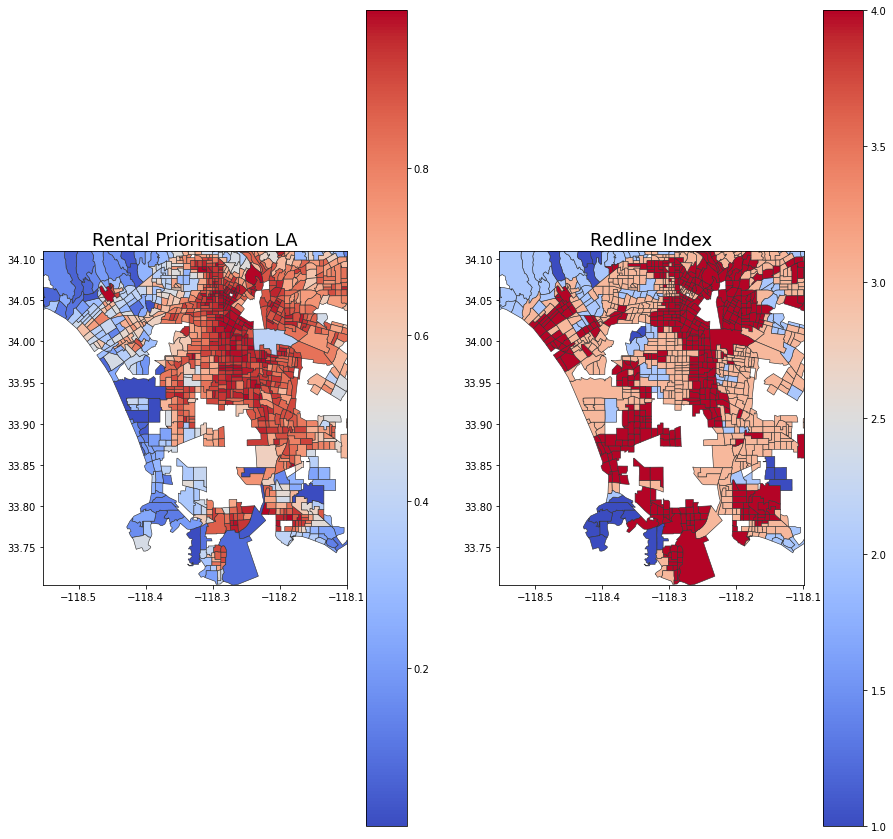

In [ ]:
#Mapping both data for LA
rental_redline_map(33.703996, 34.109748,-118.553885, -118.099326,'LA',cali_redline)

#### Bay Area

(-122.518342, -122.354233)

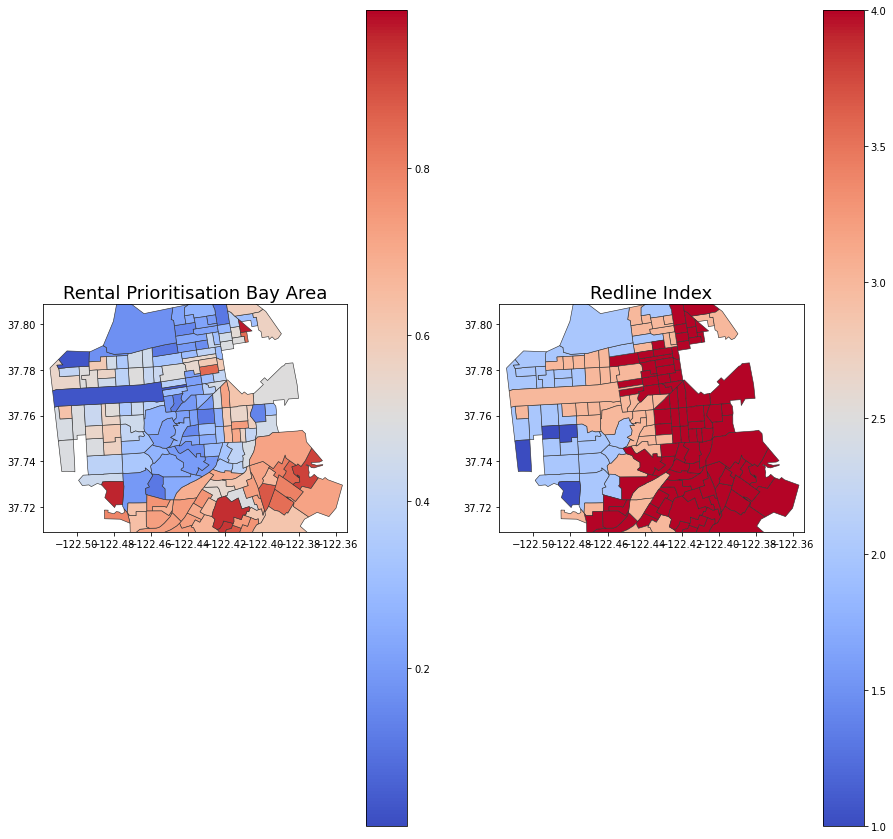

In [ ]:
#Mapping both data for Bay Area
rental_redline_map(37.709061, 37.808676,-122.518342, -122.354233,'San Francisco',cali_redline)

#### New York

(-74.259376, -73.725166)

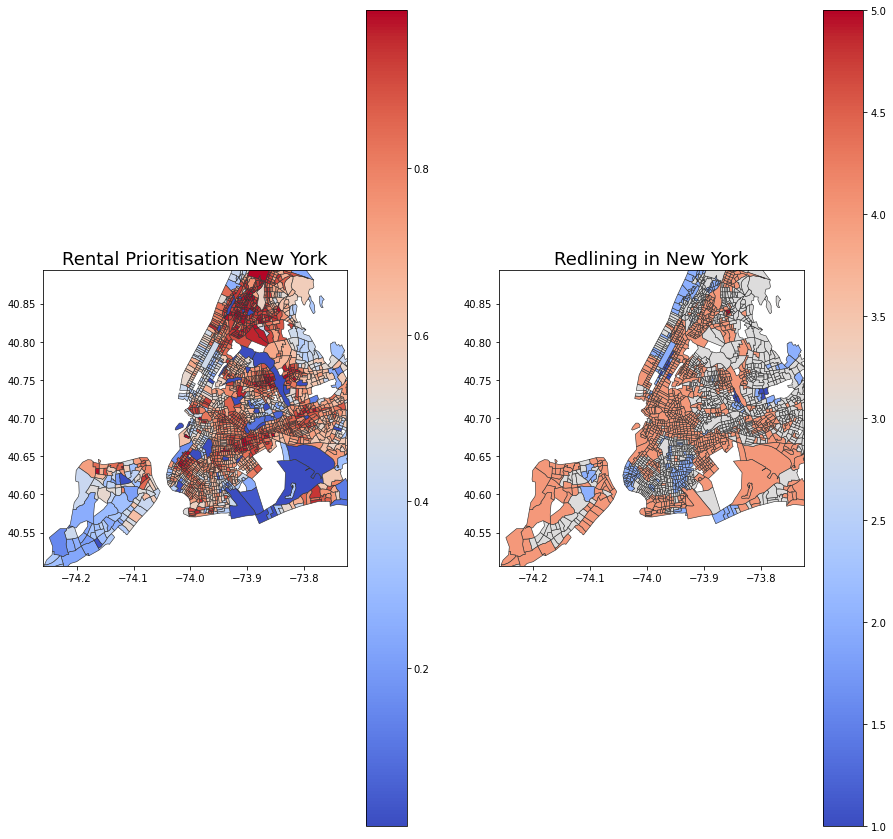

In [ ]:
#Mapping both data for New York City
rental_redline_map(40.506299, 40.893601,-74.259376, -73.725166,'New York',ny_redline)

#### Chicago

(-87.684688, -87.508906)

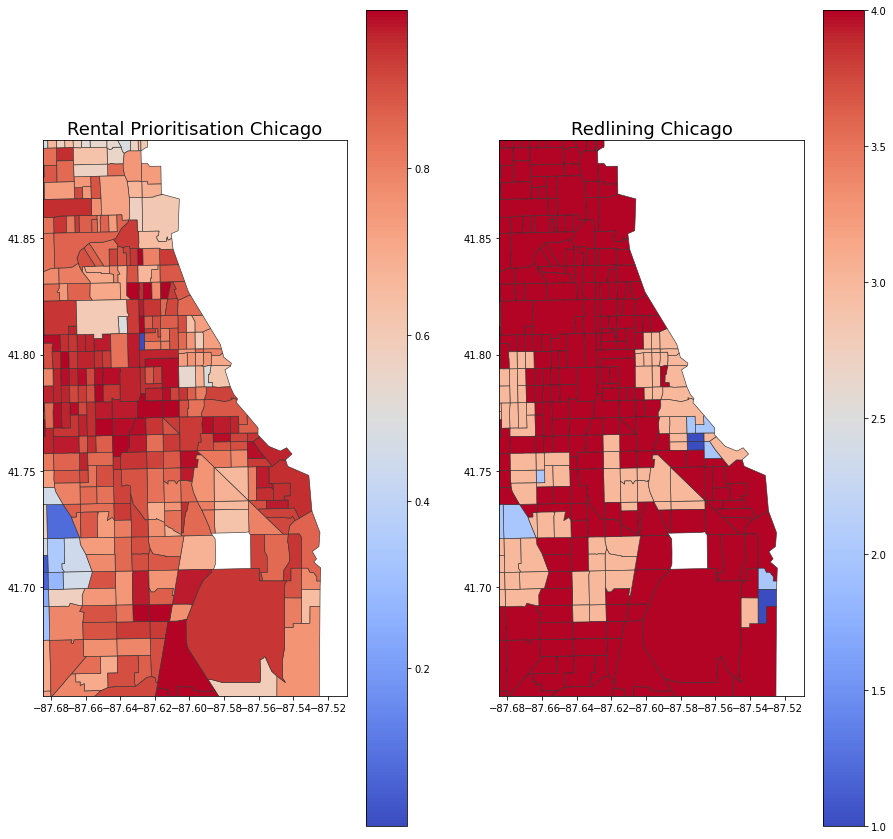

In [ ]:
#Mapping both data for Chicago
rental_redline_map(41.653128, 41.892277,-87.684688, -87.508906,'Chicago',chicago_redline)

#### Dallas

(-96.914445, -96.628801)

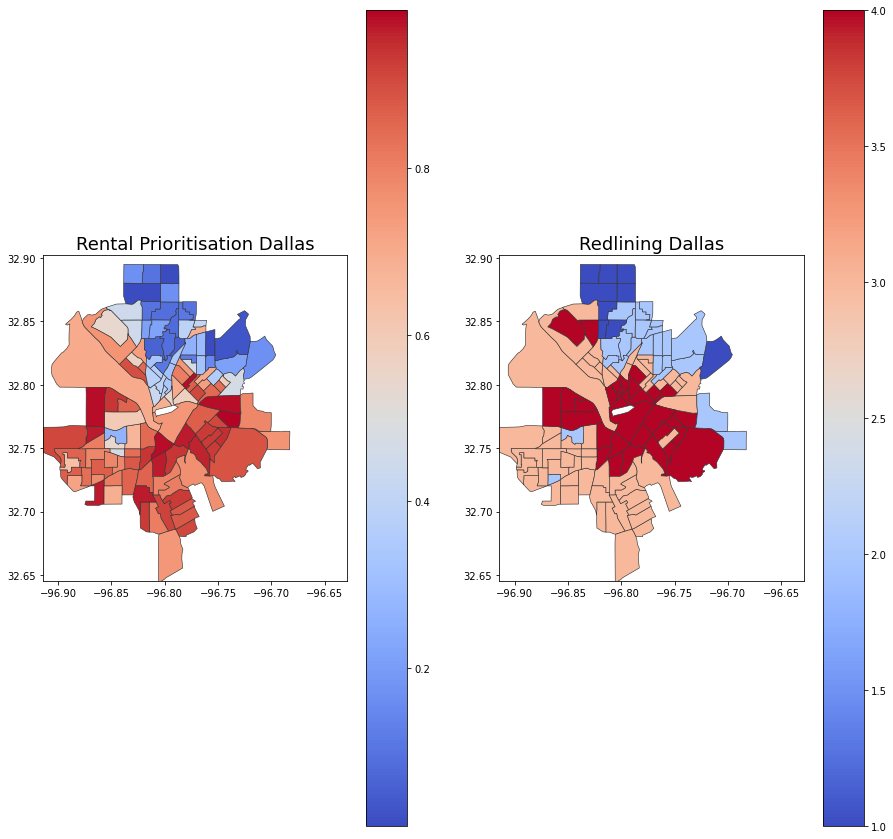

In [ ]:
#Mapping both data for Dallas
rental_redline_map(32.645012, 32.902506,-96.914445, -96.628801,'Dallas',dallas_redline)

#### Detroit

(-83.243609, -82.898913)

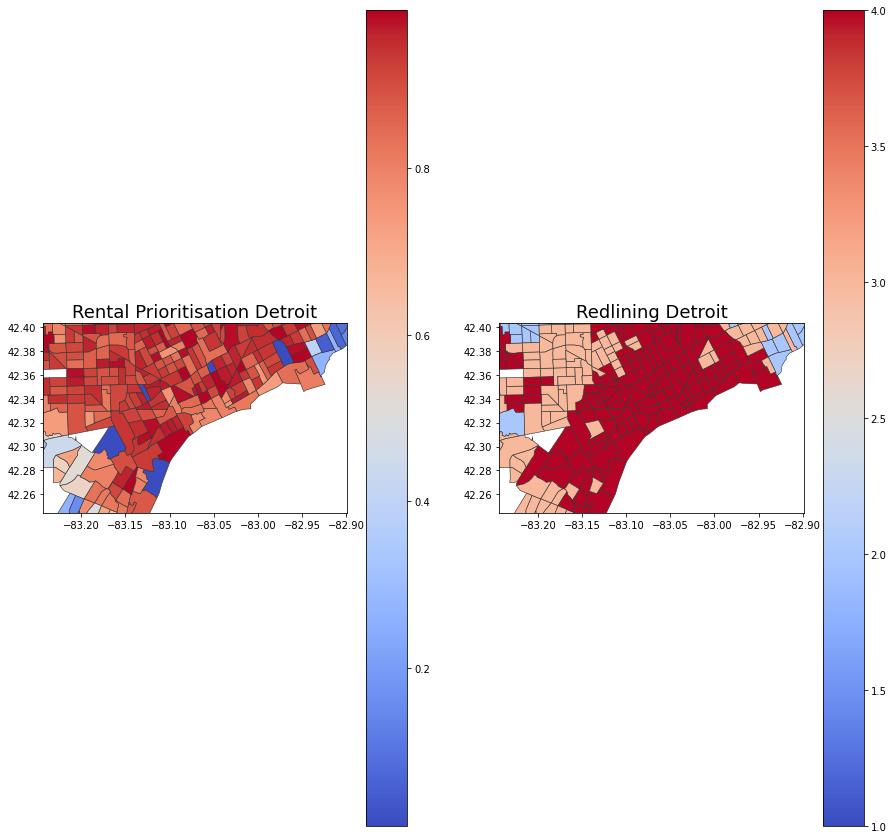

In [ ]:
#Mapping both data for Detroit
rental_redline_map(42.244090, 42.403499,-83.243609, -82.898913,'Detroit',detroit_redline)

#### Minneapolis

(-93.355556, -93.13377)

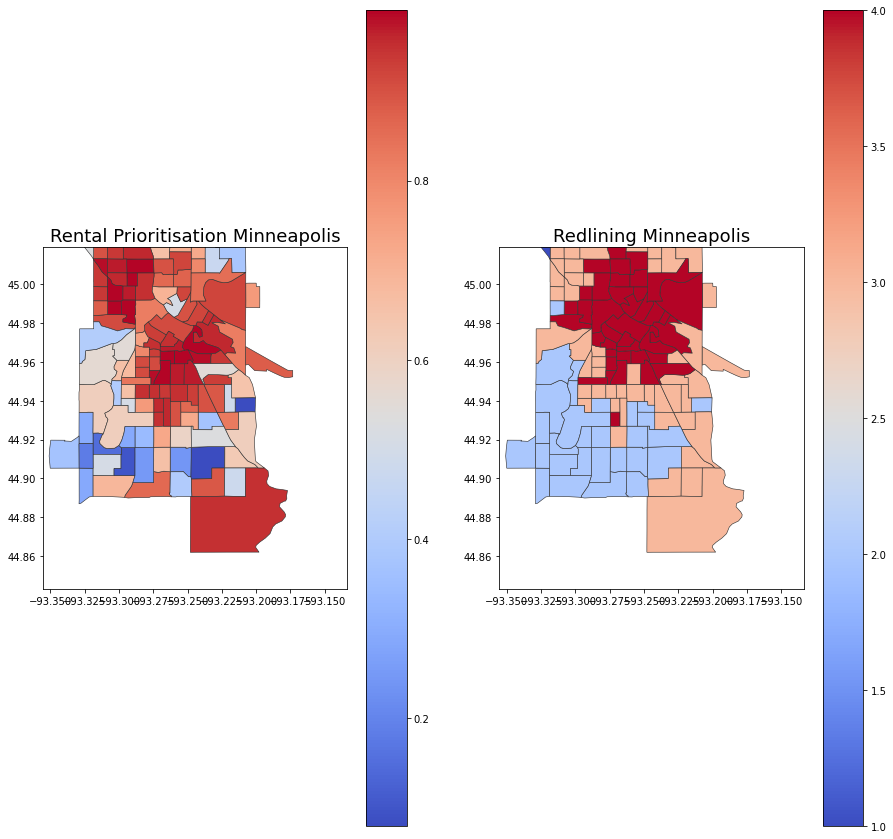

In [ ]:
#Mapping data for Minneapolis
rental_redline_map(44.842875, 45.019335,-93.355556,-93.133770,'Minneapolis',minneapolis_redline)

#### Newark

(-74.252472, -74.116516)

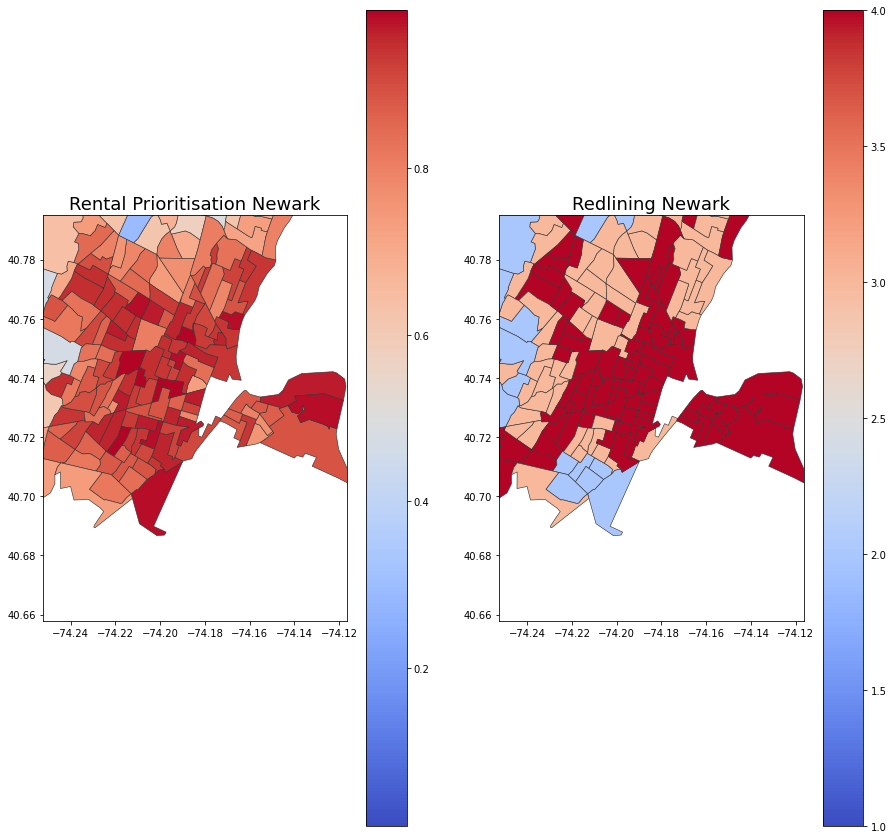

In [ ]:
#Mapping data for Newark
rental_redline_map(40.657722, 40.795098,-74.252472,-74.116516,'Newark',newark_redline)

#### Tampa

(-82.562047, -82.383519)

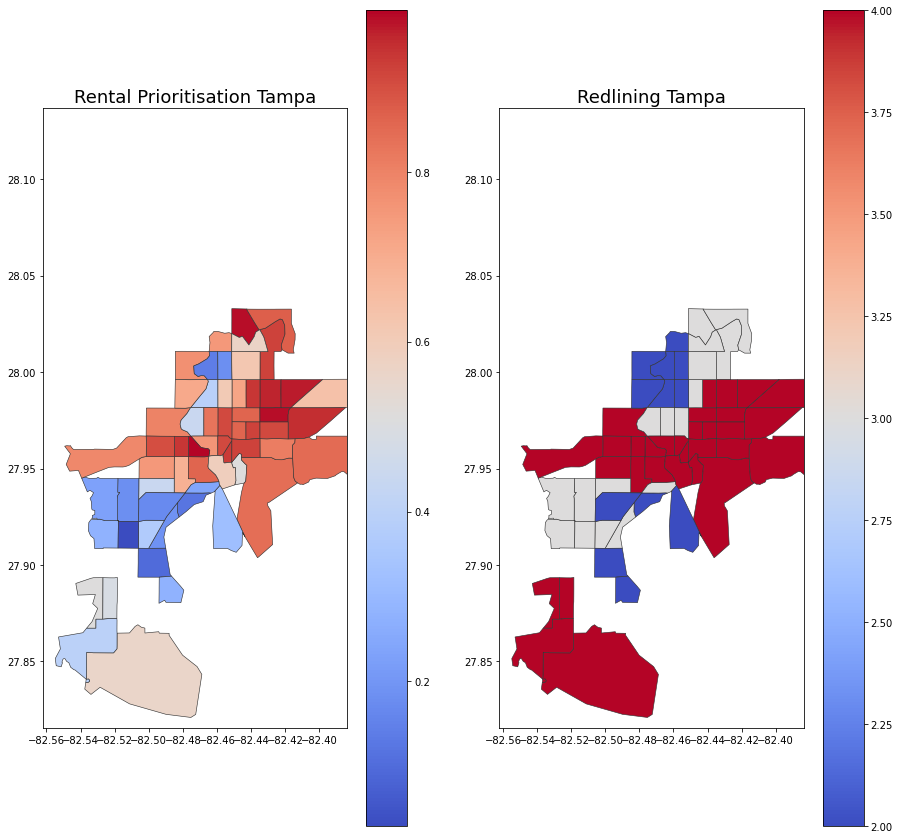

In [ ]:
#Mapping data for Tampa
rental_redline_map(27.815432, 28.136826,-82.562047, -82.383519,'Tampa',tampa_redline)

(-84.570093, -84.353113)

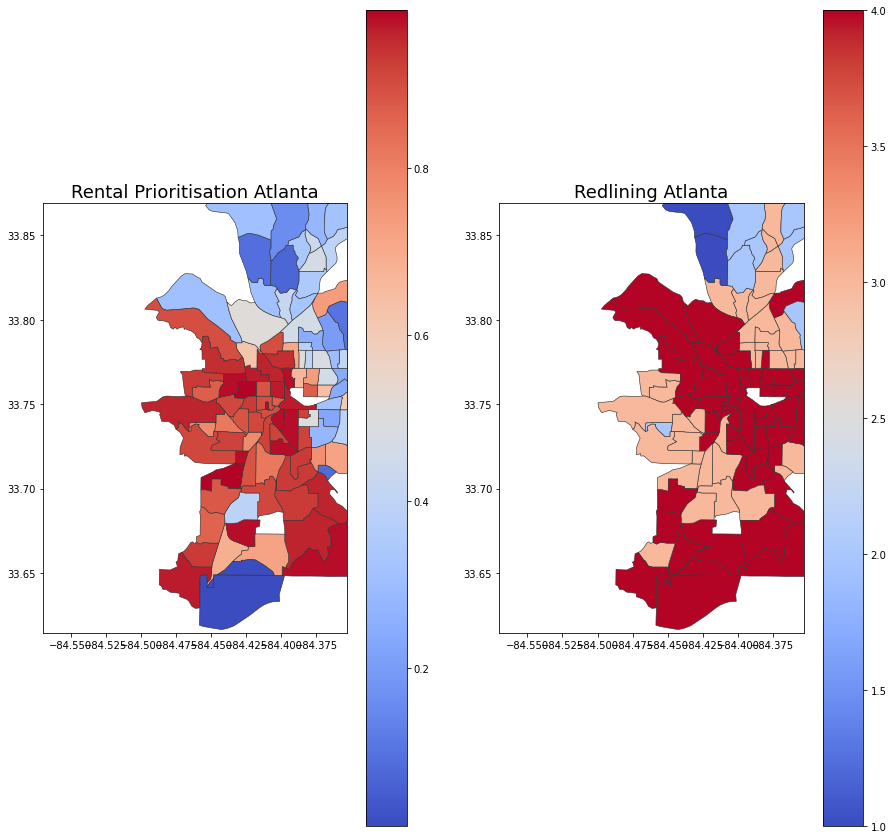

In [ ]:
#Mapping data for Atlanta
rental_redline_map(33.614400, 33.869057,-84.570093, -84.353113,'Atlanta',atlanta_redline)

(-71.128787, -70.983219)

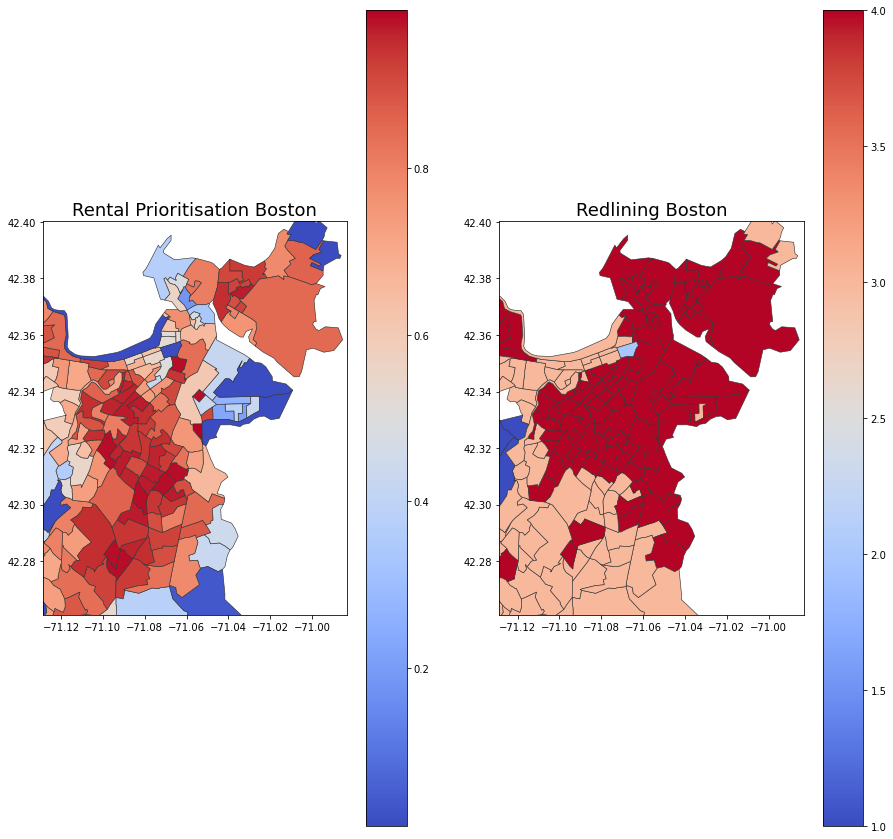

In [ ]:
#Mapping data for Boston
rental_redline_map(42.261061, 42.400148,-71.128787,-70.983219,'Boston',boston_redline)

(-95.541229, -95.141602)

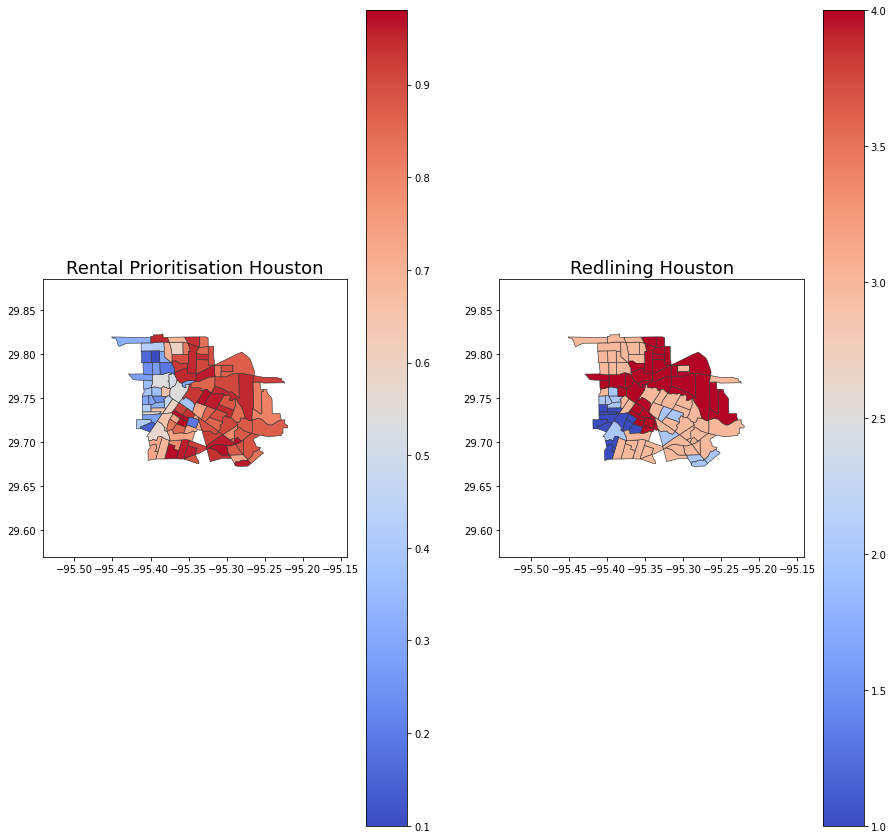

In [ ]:
#Mapping data for Houston
rental_redline_map(29.568679, 29.885900,-95.541229, -95.141602,'Hoston',houston_redline)

(-86.875063, -86.682802)

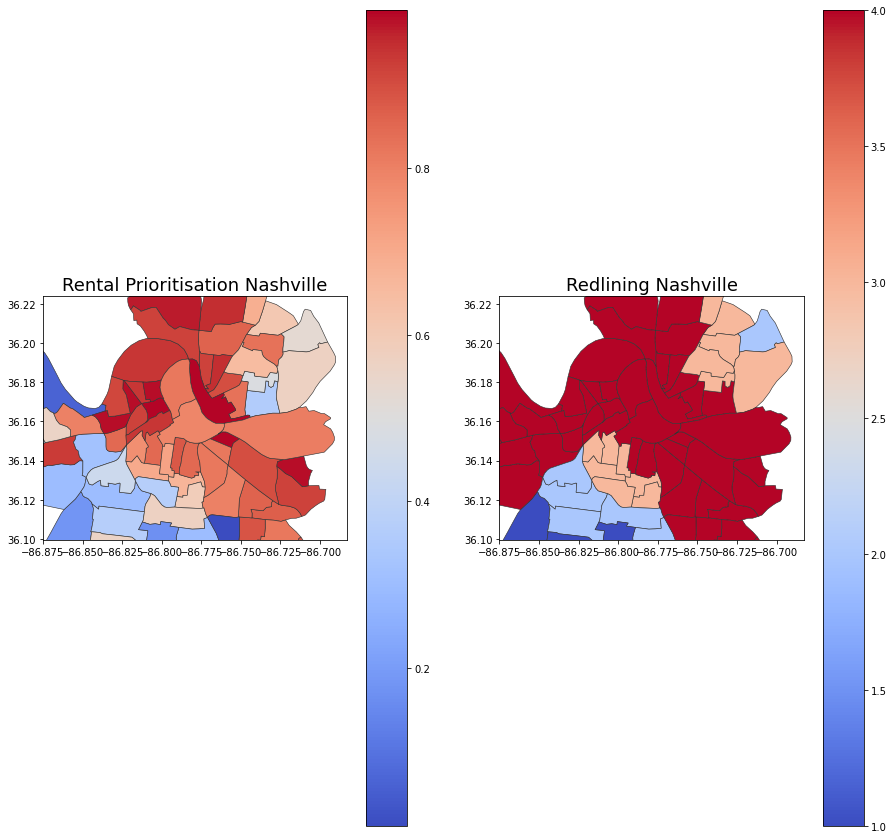

In [ ]:
#Mapping data for Nashville
rental_redline_map(36.099351, 36.224083,-86.875063, -86.682802,'Nashville',nashville_redline)

(-90.348129, -90.165482)

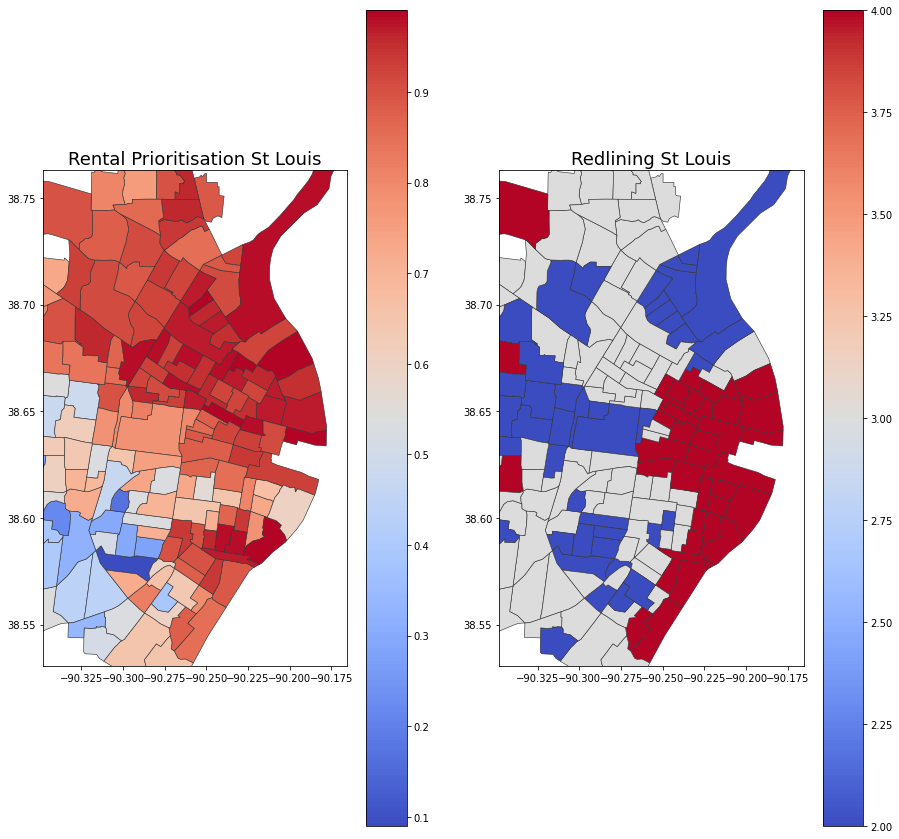

In [ ]:
#Mapping data for Nashville
rental_redline_map(38.530442, 38.763186,-90.348129, -90.165482,'St. Louis',stlouis_redline)

In [ ]:
import shutil

shutil.move("/work/COVIDRedlining/rent_vs_redline.ipynb", "/work/COVIDRedlining/EDA")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c9a4f701-31a5-4164-b3f3-c09cddf1309e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>